In [1]:
from app.scale import Scale
from app.scale import generate_chord_notes_from_chord_name, generate_scale_from_chord_name
from app.utils import utils

In [2]:
scale = Scale('C D E F G A B'.split(' '))
scale.name

'C major'

In [3]:
dominant_scale = scale.get_dominant_scale('E')

print("Scale: ", dominant_scale.notes)
print("Intervals: ", dominant_scale.intervals)
print("Scale name: ", dominant_scale.name)

new_root = 'A'
dominant_scale = dominant_scale.reorder(new_root)

print(f"\n{new_root} as root")
print("Scale: ", dominant_scale.notes)
print("Intervals: ", dominant_scale.intervals)
print("Scale name: ", dominant_scale.name)

Scale:  ['E', 'F', 'G#', 'A', 'B', 'C', 'D']
Intervals:  ['1', 'b2', '3', '4', '5', 'b6', 'b7']
Scale name:  E phrygian dominant

A as root
Scale:  ['A', 'B', 'C', 'D', 'E', 'F', 'G#']
Intervals:  ['1', '2', 'b3', '4', '5', 'b6', '7']
Scale name:  A harmonic minor


In [4]:
from app.key import Key

dominant_key = Key(dominant_scale)
dominant_key.chords

['Am7M', 'Bm7(b5)', 'C7M(#5)', 'Dm7', 'E7', 'F7M', 'G#dim']

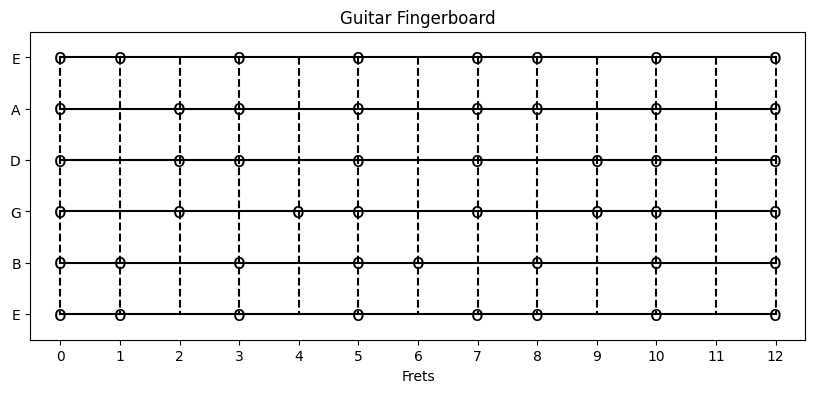

In [1]:
import matplotlib.pyplot as plt
import numpy as np

class Guitar:
    def __init__(self, tuning=None):
        if tuning is None:
            tuning = ['E', 'A', 'D', 'G', 'B', 'E']
        self.tuning = tuning
        self.notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    
    def get_note_positions(self, scale_notes):
        positions = {}
        for string_idx, open_note in enumerate(self.tuning):
            string_positions = []
            open_note_idx = self.notes.index(open_note)
            for fret in range(13):  # Usually, a 12-fret layout is enough
                note = self.notes[(open_note_idx + fret) % 12]
                if note in scale_notes:
                    string_positions.append(fret)
            positions[string_idx + 1] = string_positions
        return positions

    def fingerboard(self, scale_notes):
        note_positions = self.get_note_positions(scale_notes)
        fig, ax = plt.subplots(figsize=(10, 4))

        # Draw the guitar fingerboard
        for string in range(6):
            ax.plot([0, 12], [string + 1, string + 1], 'k-')  # Draw strings
        for fret in range(13):
            ax.plot([fret, fret], [1, 6], 'k--')  # Draw frets

        # Plot the scale notes
        for string, frets in note_positions.items():
            for fret in frets:
                ax.text(fret, string, 'o', ha='center', va='center', fontsize=15)

        ax.set_xlim(-0.5, 12.5)
        ax.set_ylim(0.5, 6.5)
        ax.set_xticks(range(13))
        ax.set_yticks(range(1, 7))
        ax.set_yticklabels(['E', 'B', 'G', 'D', 'A', 'E'][::-1])
        ax.set_xlabel('Frets')
        ax.set_title('Guitar Fingerboard')
        plt.gca().invert_yaxis()
        plt.show()

# Example usage
guitar = Guitar()
scale_notes = ['C', 'D', 'E', 'F', 'G', 'A', 'B']  # C Major Scale
guitar.fingerboard(scale_notes)
